# Employee Attrition Prediction



## Project Canvas

### Background



A health consultancy company that has thousands of employees spread across the globe, believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. 

### Value Proposition



The Head of People Operations wants to bring down the cost of retaining employees. For this, he/she proposes limiting the incentives to only those employees who are at risk of attrition. 



### Objective

* To identify the different factors that drive attrition
* To build a model to predict if an employee will attrite or not

### Methodology and Approach

Define the methodology you want to approach this use case with.

1. Perform some ***basic data analysis and exploratory analysis***.
2. Decide the ***models that will be used***.
3. Define which ***metrics will be used*** to judge model performance.
4. Perform ***model data pre-processing and prepration***.
5. ***Train models***.
  - For each model type:
    - First use *default parameters*, then score against the test/validation dataset.
    - Then, perform *hyper-parameter tuning* to find the best parameters, retrain and rescore.
    - Select the best parameter set for each model.
6. Select the ***best model*** based on the metrics you have defined
7. Give the observations / feedback / recommendations

### Data Description



**Data Dictionary**

The data contains information on employees' demographic details, work-related metrics, and attrition flag.

* **EmployeeNumber** - Unique Employee Identifier
* **Attrition** - Did the employee attrite or not?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available
* **Department** - Employee's Department
* **DistanceFromHome** - Distance from work to home (in KM)
* **Education** - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Whether the employee is over 18 years of age?
* **OverTime** - Whether the employee is doing overtime?
* **PercentSalaryHike** - The percentage increase in the salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager


## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

from joblib import parallel_backend

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import system 
import sys

%reload_ext autoreload
%autoreload 2


### Import helper functions to be used later

In [2]:
# Append the directory to your python path using sys
sys.path.append('../utilities')

# Import the utils.py file
import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/christopherpaskins/Projects/Machine Learning/machine-learning/Misc/../utilities/utils.py'>

### Read in the dataset

In [3]:
# Read the dataset file
data = pd.read_excel('https://drive.google.com/uc?export=download&id=1LpTWVhgsUbROy45PhObg4sKqOyYPl35C')

In [4]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

### Data Overview



In [5]:
# View the first 5 rows of the dataset
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Understand the shape of the data
data.shape

(2940, 34)

In [7]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

In [8]:
#check for duplicate values
data.duplicated().sum()

0

In [9]:
# Checking the count of unique values in each column
data.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observations**
- Text goes here to summarize the section


## Exploratory Data Analysis (EDA)

***We have another project that we look at in depth EDA for this dataset it is located here if you want to see all the insights***

[Summary Link](../ExploratoryDataAnalysis/EDA-Employee-Attrition.ipynb) 

Here is the summary:

* The dataset is ***imbalanced*** with the attrition rate at 16.1%.
* ***EmployeeNumber***, ***Over18***, and ***StandardHours*** can be removed from the analysis as it provides no value.
* There is ***multicollinearity***, it is normal because there are variables that are related to each other, for example salary and working years. 
* Among employees who travel a lot, the attrition rate is much higher
* ***HR, Marketing*** and those with ***Technical Degrees*** have higher attrition
* Job roles that include ***HR, Labratory Technicians and Sales Representatives*** have the highest attrition
* ***Single people*** have the highest propensity to attrite
* If you have to work ***overtime***, your attrition rate is much higher.
* The ***sales representatives who travel frequently and work overtime***, ***100%*** percent are not very happy! 
* It is also significant in ***Human Resources*** as well at about a 50% attrition rate for the above condition.
* ***Labratory technicians that work overtime*** (whether they travel or not) attrite at a 50% rate
* The ***18-30 age group*** is twice as likely to attrite.
* ***Working far away from home*** is also important, here we see that from 10 km away it begins to be noticed in the 

## Model Selection

For a supervised classification use case, there are numerous algorithms you can use, each with its own strengths and suitability for different kinds of data and problem complexities. Here's a list of commonly used classification algorithms along with a brief description of each:

1. **Logistic Regression**
  - Type: Linear model
  - Use Case: Binary or multinomial classification
  - Pros: Simple, interpretable, fast
  - Cons: Assumes linear decision boundaries, not suitable for complex relationships
2. **Decision Trees**
  - Type: Tree-based model
  - Use Case: Binary or multiclass classification
  - Pros: Easy to interpret, can handle non-linear data
  - Cons: Prone to overfitting
3. **Random Forest**
  - Type: Ensemble of Decision Trees
  - Use Case: Binary or multiclass classification
  - Pros: Handles overfitting better than individual decision trees, good performance
  - Cons: Less interpretable due to ensemble nature
4. **Gradient Boosting Machines (GBM)**
  - Type: Ensemble of weak prediction models (often decision trees)
  - Use Case: Binary or multiclass classification
  - Pros: Often provides high accuracy, can handle various types of data
  - Cons: Can be slow to train, prone to overfitting if not tuned properly
5. **Support Vector Machines (SVM)**
  - Type: Based on the concept of decision planes
  - Use Case: Binary classification, but can be extended to multiclass
  - Pros: Effective in high-dimensional spaces
  - Cons: Memory-intensive, not suitable for large datasets
6. **K-Nearest Neighbors (KNN)**
  - Type: Instance-based learning
  - Use Case: Binary or multiclass classification
  - Pros: Simple, effective, non-parametric
  - Cons: Slow with large datasets, sensitive to irrelevant features
7. **Naive Bayes (NB)**
  - Type: Probabilistic model based on applying Bayes' theorem
  - Use Case: Text classification (e.g., spam detection), binary or multiclass classification
  - Pros: Fast, suitable for high-dimensional data
  - Cons: Assumes independence between predictors
8. **AdaBoost**
  - Type: Ensemble method that combines multiple weak classifiers to create a strong classifier
  - Use Case: Binary or multiclass classification
  - Pros: Simple to implement, often provides good results
  - Cons: Sensitive to noisy data and outliers
9. **Linear Discriminant Analysis (LDA)**
  - Type: Supervised method for dimensionality reduction and classification.
  - Use Case: Suitable for binary or multiclass classification where predictors are normally distributed with equal covariance across classes.
  - Pros: Efficient in high dimensions, less prone to overfitting, explicit model representation.
  - Cons: Assumes Gaussian distribution and equal covariance matrices, less effective with non-linear separability.
10. **Quadratic Discriminant Analysis (QDA)**
  - Type: Supervised classification technique with a quadratic decision boundary.
  - Use Case: Fits complex classification problems where classes have different covariance matrices.
  - Pros: Flexible with different covariance structures, better for complex problems.
  - Cons: More prone to overfitting, computationally intensive, assumes normal distribution within classes.

***Choosing the Right Algorithm***

The choice of algorithm depends on several factors, including:

Data size, quality, and nature: Some algorithms work better with large or high-dimensional datasets, while others are suited for smaller datasets.

Complexity of the task: For linear relationships, simpler models like logistic regression may suffice. For complex relationships, ensemble methods might be more appropriate.

Performance requirements: If interpretability is key, decision trees or logistic regression might be preferred. If the highest accuracy is the goal, more complex models like gradient boosting machines or ensemble methods could be better choices.

Computational resources: Some algorithms, especially ensemble methods, require significant computational power and training time.

## Selecting Metrics

For balanced datasets, accuracy might suffice, but for imbalanced datasets, precision, recall, F1 score, or ROC-AUC might be more appropriate. Similarly, if false positives and false negatives have different costs, precision and recall can provide more insights than accuracy alone.

1. ***Accuracy***: The proportion of true results (both true positives and true negatives) among the total number of cases examined. It's simple and intuitive but can be misleading for imbalanced classes.

2. ***Precision*** (Positive Predictive Value): The ratio of true positive results to all positive results, including those not identified correctly. It's important when the cost of a false positive is high.

3. ***Recall*** (Sensitivity or True Positive Rate): The ratio of true positive results to all actual positives. It's crucial when the cost of a false negative is high.

4. ***F1 Score***: The harmonic mean of precision and recall, providing a balance between the two metrics. It's useful when you need a single metric to compare models directly, especially in imbalanced classes.

5. ***Confusion Matrix***: A table laying out the performance of a classification model. Although not a metric, it provides insight into the types of errors made by the model.

6. ***ROC-AUC*** (Receiver Operating Characteristic - Area Under Curve): This metric is used to compare the model's true positive rate to its false positive rate at various thresholds. The AUC represents a model's ability to discriminate between positive and negative classes. An AUC of 1 indicates a perfect model; an AUC of 0.5 suggests no discriminative power.

**Metrics choosen:**
- We will choose to ***optimize our models on Recall***, while trying to maintain a competitive accuracy. A higher cost is incurred when we miss on potential employee attrition.

## Feature Engineering / Data Preparation



**Drop columns that provide no value**

In [11]:
data.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

**Map the binary categories to 1's and 0's**

In [12]:
# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

data['OverTime'] = data.OverTime.map(dict_OverTime)
data['Attrition'] = data.Attrition.map(dict_attrition)

### Loop through all the combinations of imputation, scaling, sampling and model techniques

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

#set the random state
rs = 42

# Prepare the dataset by encoding categorical variables
data_prepared = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole'], drop_first=True)

# Define imputation and scaling techniques
imputation_strategies = {
    'median': SimpleImputer(strategy='median'),
    'mean': SimpleImputer(strategy='mean'),
    'knn': KNNImputer(n_neighbors=8)
}

# Define scaling techniques
scaling_techniques = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

# Define sampling techniques
sampling_techniques = {
    'None': 'NA',
    'Over Sampling': SMOTE(random_state=rs),
    'Under Sampling': RandomUnderSampler(random_state=rs)
}

# Define classification algorithms
classification_models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=rs),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=rs),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=rs),
    'DecisionTree': DecisionTreeClassifier(random_state=rs),
    'AdaBoost': AdaBoostClassifier(random_state=rs),
    'GradientBoosting': GradientBoostingClassifier(random_state=rs),
    'Gaussian': GaussianNB(),
    'LinearDiscriminant': LinearDiscriminantAnalysis(),
    'QuadraticDiscriminant': QuadraticDiscriminantAnalysis()
}
 
# Reinitialize storage for metrics, now including accuracy, precision, and AUC
metrics_scores_models = {}
metrics_cores = pd.DataFrame()

# Perform the comprehensive analysis for each combination

# loop through the impute strategies
for impute_strategy, imputer in imputation_strategies.items():
    numerical_data = data_prepared.select_dtypes(include=['float64', 'int64'])
    imputed_data = imputer.fit_transform(numerical_data)
    data_prepared[numerical_data.columns] = imputed_data
    
    # loop through the scaling strategies
    for scale_strategy, scaler in scaling_techniques.items():
        X = data_prepared.drop('Attrition', axis=1)
        y = data_prepared['Attrition']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # loop through the sampling strategies
        for sampling, sampling_type in sampling_techniques.items():
            if sampling != 'None':
                X_train_res, y_train_res = sampling_type.fit_resample(X_train_scaled, y_train)
        
            # loop through the model techniques
            for model_name, model in classification_models.items():
                if sampling != 'None':
                    model.fit(X_train_res, y_train_res)
                else:
                    model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred)

                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred_proba)
                f1score = f1_score(y_test, y_pred)

                # Storing the metrics
                metrics_scores_models = {
                    'Model Name': model_name,
                    'Sampling': sampling,
                    'Impute Strategy': impute_strategy,
                    'Scale Strategy': scale_strategy,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-Score': f1score,
                    'AUC': auc
                }
                metrics_cores = pd.concat([metrics_cores, pd.DataFrame([metrics_scores_models])], ignore_index=True)

#### Look at the F1-Score for the effect the different imputation techniques has

In [14]:
# Step 1: Calculate min and max F1-Score difference for each group
f1_diff = metrics_cores.groupby(['Model Name', 'Sampling', 'Scale Strategy'])['F1-Score'].agg(['min', 'max']).reset_index()
f1_diff['Difference'] = f1_diff['max'] - f1_diff['min']

# Step 2: Create pivot table with 'Impute Strategy' categories as columns
pivot_df_impute = metrics_cores.pivot_table(values='F1-Score', 
                          index=['Model Name', 'Sampling', 'Scale Strategy'], 
                          columns='Impute Strategy', 
                          aggfunc=np.mean).reset_index()

# Merge the pivot table with the F1-Score difference
pivot_df = pd.merge(pivot_df_impute, f1_diff[['Model Name', 'Sampling', 'Scale Strategy', 'Difference']], 
                    on=['Model Name', 'Sampling', 'Scale Strategy'])

print(f"The Mean difference in F1-Score for imputation is: {pivot_df['Difference'].mean()}")

The Mean difference in F1-Score for imputation is: 0.0


#### Look at the F1-Score for the effect the different scaling techniques has

In [15]:
# look to see the different techniques effect on the f1-score metric
# Impute

# Step 1: Calculate min and max F1-Score difference for each group
f1_diff2 = metrics_cores.groupby(['Model Name', 'Sampling'])['F1-Score'].agg(['min', 'max']).reset_index()
f1_diff2['Difference'] = f1_diff2['max'] - f1_diff2['min']

# Step 2: Create pivot table with 'Scaling Strategy' categories as columns
pivot_df_scale = metrics_cores.pivot_table(values='F1-Score', 
                          index=['Model Name', 'Sampling'], 
                          columns='Scale Strategy', 
                          aggfunc=np.mean).reset_index()

# Merge the pivot table with the F1-Score difference
pivot_dfs = pd.merge(pivot_df_scale, f1_diff2[['Model Name', 'Sampling', 'Difference']], 
                    on=['Model Name', 'Sampling'])

print(f"The Mean difference in F1-Score for scaling is: {pivot_dfs['Difference'].mean()}")

The Mean difference in F1-Score for scaling is: 0.0159125291602563


#### Look at the F1-Score for the effect the different sampling techniques has

In [16]:
# look to see the different techniques effect on the f1-score metric
# Impute

# Step 1: Calculate min and max F1-Score difference for each group
f1_diff3 = metrics_cores.groupby(['Model Name', 'Scale Strategy'])['F1-Score'].agg(['min', 'max']).reset_index()
f1_diff3['Difference'] = f1_diff3['max'] - f1_diff3['min']

# Step 2: Create pivot table with 'Sampling Strategy' categories as columns
pivot_df_sa = metrics_cores.pivot_table(values='F1-Score', 
                          index=['Model Name', 'Scale Strategy'], 
                          columns='Sampling', 
                          aggfunc=np.mean).reset_index()

# Merge the pivot table with the F1-Score difference
pivot_dfsa = pd.merge(pivot_df_sa, f1_diff3[['Model Name', 'Scale Strategy', 'Difference']], 
                    on=['Model Name', 'Scale Strategy'])

print(f"The Mean difference in F1-Score for sampling is: {pivot_dfsa['Difference'].mean()}")

The Mean difference in F1-Score for sampling is: 0.14829649617141472


***Drop the Imputation scores as they have no effect on the outcome***

In [17]:
metrics_final = metrics_cores.drop(columns=['Impute Strategy']).groupby(['Model Name', 'Sampling', 'Scale Strategy']).agg({
    'Accuracy': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'F1-Score': 'mean',
    'AUC': 'mean'
}).reset_index()


***Look at the top 20 model combinations for recall***

In [18]:
metrics_final.sort_values(by='Recall', ascending=False).head(20).style.background_gradient(cmap='Greens', subset=['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'], axis=0)

,Model Name,Sampling,Scale Strategy,Accuracy,Precision,Recall,F1-Score,AUC
63,QuadraticDiscriminant,None,minmax,0.265306,0.185255,0.989899,0.312102,0.848051
71,QuadraticDiscriminant,Under Sampling,standard,0.272109,0.185468,0.979798,0.311897,0.816343
70,QuadraticDiscriminant,Under Sampling,robust,0.268707,0.184762,0.979798,0.310897,0.815135
69,QuadraticDiscriminant,Under Sampling,minmax,0.267007,0.184411,0.979798,0.310400,0.814112
68,QuadraticDiscriminant,Over Sampling,standard,0.309524,0.193613,0.979798,0.323333,0.800861
67,QuadraticDiscriminant,Over Sampling,robust,0.307823,0.193227,0.979798,0.322795,0.809496
66,QuadraticDiscriminant,Over Sampling,minmax,0.309524,0.193613,0.979798,0.323333,0.798135
65,QuadraticDiscriminant,None,standard,0.265306,0.184061,0.979798,0.309904,0.849012
64,QuadraticDiscriminant,None,robust,0.263605,0.183712,0.979798,0.309410,0.845355
41,KNN,Over Sampling,standard,0.797619,0.451456,0.939394,0.609836,0.936089


**Observations**

* QuadraticDiscriminant has the best recall scores, however the other metrics are severely negatively impacted.
* Decision Tree and Random Forrest need a closer look as most metrics give more favroable results

***Filter the results to inlcude just Decision Tree and Random Forrest***

In [19]:
metrics_final.loc[metrics_final['Model Name'].isin(['RandomForest','DecisionTree'])].sort_values(by=['Model Name', 'Sampling', 'Scale Strategy']).style.background_gradient(cmap='Greens', subset=['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'], axis=0)

,Model Name,Sampling,Scale Strategy,Accuracy,Precision,Recall,F1-Score,AUC
9,DecisionTree,None,minmax,0.969388,0.917526,0.898990,0.908163,0.941315
10,DecisionTree,None,robust,0.969388,0.917526,0.898990,0.908163,0.941315
11,DecisionTree,None,standard,0.969388,0.917526,0.898990,0.908163,0.941315
12,DecisionTree,Over Sampling,minmax,0.959184,0.878788,0.878788,0.878788,0.927124
13,DecisionTree,Over Sampling,robust,0.969388,0.900990,0.919192,0.910000,0.949371
14,DecisionTree,Over Sampling,standard,0.972789,0.902913,0.939394,0.920792,0.959472
15,DecisionTree,Under Sampling,minmax,0.784014,0.430693,0.878788,0.578073,0.821807
16,DecisionTree,Under Sampling,robust,0.785714,0.432836,0.878788,0.580000,0.822830
17,DecisionTree,Under Sampling,standard,0.784014,0.430693,0.878788,0.578073,0.821807
72,RandomForest,None,minmax,0.969388,1.000000,0.818182,0.900000,0.989176


#### Let's try to tune the two methods while varying the sampling techniques

***Loop through the two models and sampling techniques and tune with hyper-paramter gridSearchCV***

In [28]:
# set the scoring method used by all algorigthms in GridSearchCV
optimize_on = recall_score

#set the random state
rs = 42

# Prepare the dataset by encoding categorical variables
data_prepared = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole'], drop_first=True)

#Impute the data using recommended technique from the analysis
numerical_data = data_prepared.select_dtypes(include=['float64', 'int64'])
imputed_data = SimpleImputer(strategy='median').fit_transform(numerical_data)
data_prepared[numerical_data.columns] = imputed_data

# scale the data
scaler = StandardScaler()
X = data_prepared.drop('Attrition', axis=1)
y = data_prepared['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define sampling techniques
sampling_techniques = {
    'Over Sampling': SMOTE(random_state=rs),
    'Under Sampling': RandomUnderSampler(random_state=rs)
}

# Define classification algorithms
classification_models = {
    'RandomForest': { 
        'Default' : { 
            'model' : RandomForestClassifier(n_estimators=100, random_state=rs),
            'params' : None
        },
        'Tuned' : {
            'model' : RandomForestClassifier(n_estimators=100, random_state=rs),
            'params' : {'class_weight': ["balanced",{0: 0.84, 1: 0.16}],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'n_estimators': [100, 150, 200],
                'max_features': ['auto', 'sqrt', .33]
            }
        }
    },
    'DecisionTree': { 
        'Default' : { 
            'model' : DecisionTreeClassifier(random_state=rs),
            'params' : None
        },
        'Tuned' : {
            'model' : DecisionTreeClassifier(random_state=rs),
            'params' : { 
        "max_depth": np.arange(2, 10),
        'class_weight': ["balanced",{0: 0.84, 1: 0.16}],
        "criterion": ['gini', 'entropy'],
        "min_samples_leaf": [2, 5, 10, 15, 20],
        "max_leaf_nodes": [50, 75, 150, 250],
        "min_samples_split": [10, 30, 50, 70],
            }
        }
    }
}
    
# Reinitialize storage for metrics, now including accuracy, precision, and AUC
scores_models = {}
scores = pd.DataFrame()

# Perform the comprehensive analysis for each combination

# loop through the sampling strategies
for sampling, sampling_type in sampling_techniques.items():
    X_train_res, y_train_res = sampling_type.fit_resample(X_train_scaled, y_train)
    # loop through the models
    for model_name, mtype in classification_models.items():
        # loop through the training type
        for ttype, param in mtype.items(): 
            if ttype == 'Tuned':
                with parallel_backend(backend='multiprocessing', n_jobs=-1):
                    # Choose the type of classifier
                    estimator = param['model']
                    mparams = param['params']
                    scorer = metrics.make_scorer(optimize_on) 

                    # Run the grid search
                    grid_obj = GridSearchCV(estimator, mparams, scoring = scorer, cv = 3)
                    grid_obj = grid_obj.fit(X_train_res, y_train_res)

                # Set the classifier to the best combination of parameters
                tmodel = grid_obj.best_estimator_
                tmodel.fit(X_train_res, y_train_res)
            else:
                tmodel =  param['model']
                tmodel.fit(X_train_res, y_train_res)
            
            # predict using the model
            y_pred = tmodel.predict(X_test_scaled)
            y_pred_proba = tmodel.predict_proba(X_test_scaled)[:, 1] if hasattr(tmodel, "predict_proba") else [0] * len(y_pred)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_pred_proba)
            f1score = f1_score(y_test, y_pred)

            # Storing the metrics
            scores_models = {
                'Model Name': model_name,
                'Type': ttype,
                'Sampling': sampling,
                'Model Paramters' : tmodel,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1score,
                'AUC': auc
            }
            scores = pd.concat([scores, pd.DataFrame([scores_models])], ignore_index=True)

***Let's look at the results***

In [29]:
#print the dataframe with the metrics from all the models with scored test data sets
scores.style.background_gradient(cmap='Greens', subset=['Precision','Recall','F1-Score','Accuracy', 'AUC'], axis=0)

,Model Name,Type,Sampling,Model Paramters,Accuracy,Precision,Recall,F1-Score,AUC
0,RandomForest,Default,Over Sampling,RandomForestClassifier(random_state=42),0.979592,1.000000,0.878788,0.935484,0.997769
1,RandomForest,Tuned,Over Sampling,"RandomForestClassifier(class_weight={0: 0.84, 1: 0.16}, random_state=42)",0.982993,1.000000,0.898990,0.946809,0.996013
2,DecisionTree,Default,Over Sampling,DecisionTreeClassifier(random_state=42),0.972789,0.902913,0.939394,0.920792,0.959472
3,DecisionTree,Tuned,Over Sampling,"DecisionTreeClassifier(class_weight='balanced', max_depth=9, max_leaf_nodes=150, min_samples_leaf=2, min_samples_split=10, random_state=42)",0.862245,0.584906,0.626263,0.604878,0.862159
4,RandomForest,Default,Under Sampling,RandomForestClassifier(random_state=42),0.870748,0.572327,0.919192,0.705426,0.962570
5,RandomForest,Tuned,Under Sampling,"RandomForestClassifier(class_weight={0: 0.84, 1: 0.16}, max_features=0.33, n_estimators=200, random_state=42)",0.824830,0.489474,0.939394,0.643599,0.960577
6,DecisionTree,Default,Under Sampling,DecisionTreeClassifier(random_state=42),0.784014,0.430693,0.878788,0.578073,0.821807
7,DecisionTree,Tuned,Under Sampling,"DecisionTreeClassifier(class_weight='balanced', max_depth=9, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, random_state=42)",0.731293,0.348718,0.686869,0.462585,0.782539


**Observations**

* The Random Forrest, Tuned and OverSampled is the best balanced model
* The Decision Tree, Default Oversampling has the best recall results, which could be a good choice and a close second, however the other metrics take a hit. 

#### Let's look at some of the metircs closer for the best model

**Encode the data**

In [30]:
# Prepare the dataset by encoding categorical variables
data_prepared = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole'], drop_first=True)

**Impute the data**

In [31]:
#Impute the data using recommended technique from the analysis
numerical_data = data_prepared.select_dtypes(include=['float64', 'int64'])
imputed_data = SimpleImputer(strategy='median').fit_transform(numerical_data)
data_prepared[numerical_data.columns] = imputed_data

**Scale the data**

In [32]:
scaler = StandardScaler()
X = data_prepared.drop('Attrition', axis=1)
y = data_prepared['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# get a list of the column names
numeric_cols = X_test.columns

# Convert back to DataFrame with original numeric columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

**Train the model**

In [33]:
rf = RandomForestClassifier(class_weight={0: 0.84, 1: 0.16}, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight={0: 0.84, 1: 0.16}, random_state=42)

**Predict and view the results**

                    Model  Precision  Recall  F1-Score  Accuracy  ROC-AUC
RF - Tuned - OverSampling        1.0 0.89899  0.946809  0.982993 0.996013



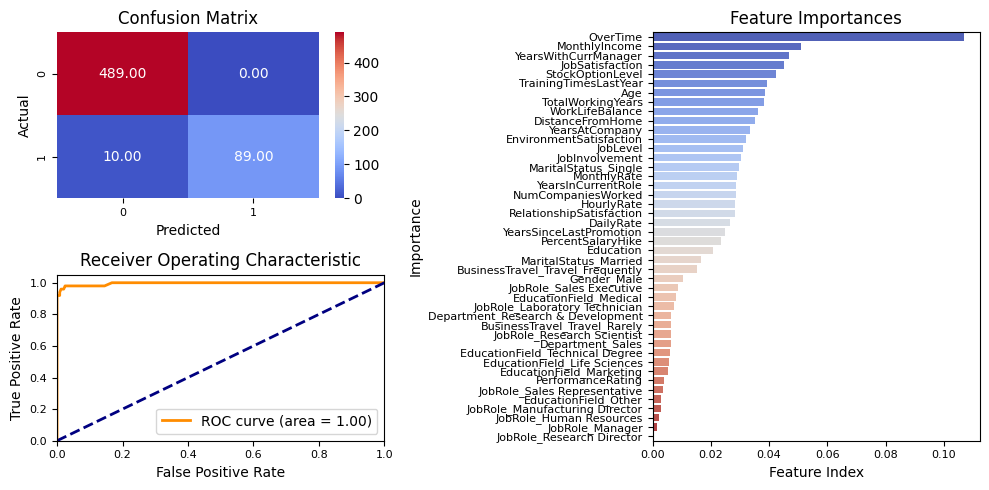

In [34]:
y_pred = rf.predict(X_test_scaled)
#y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred)

# Score the data
ds = utils.evaluate_classification_metrics('RF - Tuned - OverSampling', y_test, y_pred, X_test_scaled, rf)